In [2]:
import xlrd as xl
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
df_titanic = pd.read_csv('C:/Users/Personal/python/Datasets/titanic3.csv')

In [5]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1st,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1st,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1st,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1st,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1st,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df_titanic.shape

(1309, 14)

In [8]:

df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   object 
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 143.3+ KB


In [9]:
df_titanic.describe()

,survived,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [11]:
df_titanic.describe(include='object')

,pclass,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,1309,295,1307,486,745
unique,1,1307,2,929,186,3,27,369
top,1st,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,1309,2,843,11,6,914,39,64


In [12]:
df_titanic.pclass.value_counts()

pclass
1st    1309
Name: count, dtype: int64

In [13]:
# Clean a few columns for plotting convenience
# Convert pclass to ordered categorical, embarked to category, and ensure numeric cols are numeric
cat_order = ['1st', '2nd', '3rd']
if 'pclass' in df_titanic.columns:
    df_titanic['pclass'] = pd.Categorical(df_titanic['pclass'], categories=cat_order, ordered=True)

for col in ['age', 'fare', 'sibsp', 'parch']:
    if col in df_titanic.columns:
        df_titanic[col] = pd.to_numeric(df_titanic[col], errors='coerce')

In [14]:
# Prepare a working subset to reduce missingness
plot_df = df_titanic.copy()
plot_df = plot_df[(~plot_df['age'].isna()) & (~plot_df['fare'].isna())]

print('Prepared plot_df with shape:', plot_df.shape)

Prepared plot_df with shape: (1045, 14)


In [25]:
# Set seaborn theme
sns.set(style='whitegrid')
# Helper to tidy layout
plt.rcParams['figure.figsize'] = (8, 5)

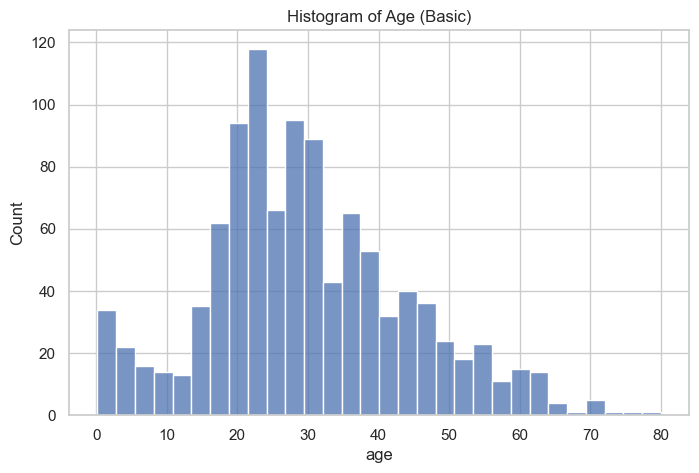

Displayed basic histogram (distribution plot)


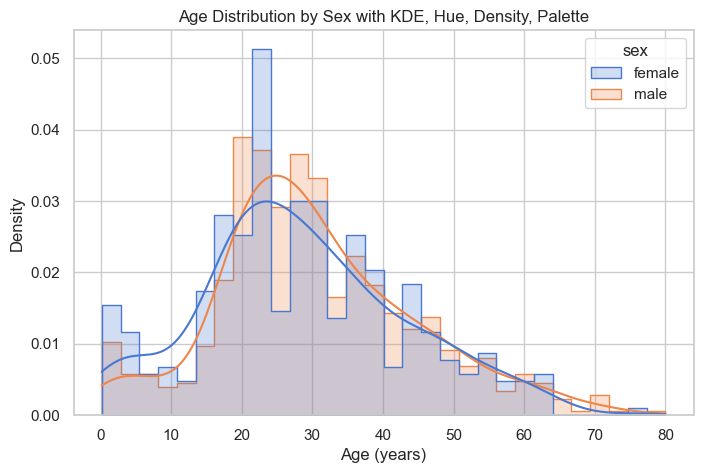

In [19]:
plt.figure()
sns.histplot(data=plot_df, x='age', bins=30, kde=True, hue='sex', element='step', stat='density', common_norm=False, palette='muted')
plt.title('Age Distribution by Sex with KDE, Hue, Density, Palette')
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.show()

Displayed basic joint plot (scatter)


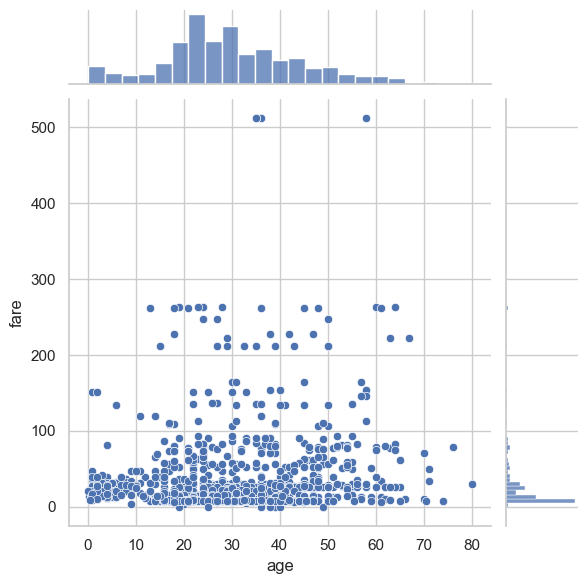

In [20]:
sns.jointplot(data=plot_df, x='age', y='fare', kind='scatter')
print('Displayed basic joint plot (scatter)')

Displayed basic boxplot of age


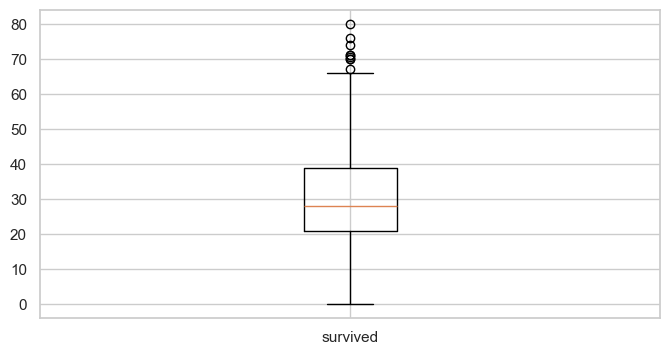

In [24]:
print('Displayed basic boxplot of age')
plt.figure(figsize=(8,4))
plt.boxplot([df_titanic['age'].dropna()], tick_labels=['survived'])
plt.show()